Homework 1
Please use the function readcorr to read data from the files that start with BR00781 and calculate the average and the std for each time point. Remember that corr_fcts[0] represents the time, and corr_fcts[1] is the correlation function. 

You need to average over the 20 data sets for each time point. 

At the end you should have three 1-dimensional arrays: time, corravg, and corrstd. You then just need to uncomment the last cell and create a semilog plot with error bars.

Below, I included some hint on how to solve the problem. For example, I show how to obtain a list of filenames that you can loop through to read all the data.
Good luck

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def readcorr(filename):
    with open(filename,'r') as f:
        for line in f:
            if line.startswith("[Corr"):
                break
        corr_fcts=[]
        for line in f:
            if line.startswith("[Raw"):
                break
            corr_fcts.append([float(a) for a in line.split()])
    corr_fcts = np.array(corr_fcts[:-1]).T
    return corr_fcts

In [4]:
# get current working directory
print(os.getcwd())
#defines the location of the data
datadir='data files/'
# get a list of files in this directory
filelist=os.listdir(datadir)
#print(filelist)
# create a list of files starting with "BR00781"
BR00781_list = [file for file in filelist if file.startswith("BR00781")]
BR00781_list

C:\Users\xuanwen\Google Drive\SBU_Academic\2017 spring\BME502 Adv. Num. Analysis\BME502-2017-master


['BR00781_01.sin',
 'BR00781_02.sin',
 'BR00781_03.sin',
 'BR00781_04.sin',
 'BR00781_05.sin',
 'BR00781_06.sin',
 'BR00781_07.sin',
 'BR00781_08.sin',
 'BR00781_09.sin',
 'BR00781_10.sin',
 'BR00781_11.sin',
 'BR00781_12.sin',
 'BR00781_13.sin',
 'BR00781_14.sin',
 'BR00781_15.sin',
 'BR00781_16.sin',
 'BR00781_17.sin',
 'BR00781_18.sin',
 'BR00781_19.sin',
 'BR00781_20.sin']

In [5]:
# My Code
corr_fcts = readcorr("data files/BR00781_01.sin")
time=corr_fcts[0]
timeshort=time[(time>1e-7) & (time<0.01)]
corr_fcts=[]
corravg=[]
corrstd=[]
#print("time",time)
#print("data",data)
for file in BR00781_list:
    corr_fcts_temp = readcorr("data files/"+file)
    corr_fcts_temp = corr_fcts_temp[1]
    corr_fcts_temp = corr_fcts_temp[(time>1e-7) & (time<0.01)]
    corr_fcts.append(corr_fcts_temp)
corr_fcts = np.array(corr_fcts).T
for timepoint in range(len(timeshort)):
    corravg.append(np.mean(corr_fcts[timepoint]))
    corrstd.append(np.std(corr_fcts[timepoint]))

In [6]:
%matplotlib inline
#plt.figure()
#plt.errorbar(time,corravg,yerr=corrstd,fmt="or")
#plt.xscale("log")
#plt.xlabel("delta t in sec")
#plt.ylabel("g(t)")

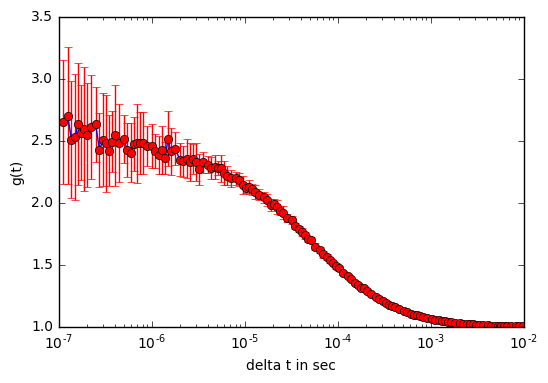

In [8]:
plt.figure()
plt.semilogx(timeshort,corravg)
plt.errorbar(timeshort,corravg,yerr=corrstd,fmt="or")
plt.xscale("log")
plt.xlabel("delta t in sec")
plt.ylabel("g(t)")